# Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.stem import SnowballStemmer

In [ ]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
songdata = pd.read_csv("https://raw.githubusercontent.com/temunix2/Book2Playlist/master/songdata.csv")
display(songdata.head())
songdata.info()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


# Dojo Start

**Task:** Count the number of songs for every artist. Return the 5 artists with the most songs together with their number of songs.

Hint: You can do this with pandas

In [ ]:
songdata.artist.value_counts().head(5)

Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Name: artist, dtype: int64

**Task:** Create a histogram with the number of words in each song.

In [ ]:
songdata['word_count'] = songdata.text.apply(lambda text: len(text.split()))
songdata.head()

,artist,song,link,text,word_count
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd...",153
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl...",260
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...,312
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...,200
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...,198


In [ ]:
#37-827
songdata['word_count_bins'] = pd.cut(songdata['word_count'], bins=range(30, 830, 30))

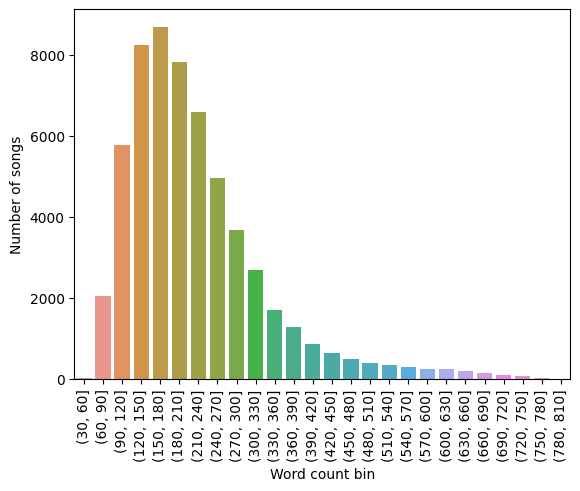

In [ ]:
sns.countplot(x='word_count_bins', data=songdata)
plt.xticks(rotation=90)
plt.xlabel('Word count bin')
plt.ylabel('Number of songs')
plt.show(block=False)

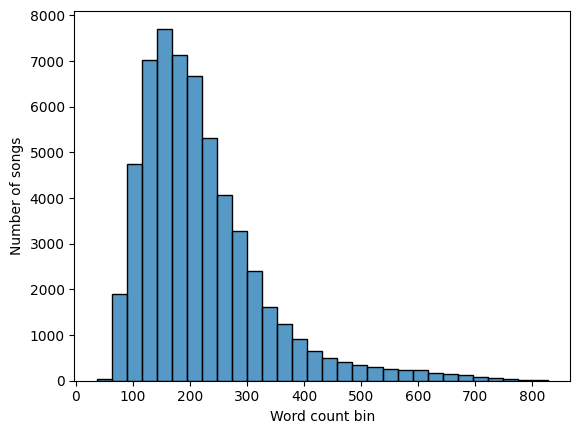

In [ ]:
sns.histplot(songdata.word_count, bins=30)
plt.xlabel('Word count bin')
plt.ylabel('Number of songs')
plt.show(block=False)

## Regular Expressions

**Task:** Count the number of songs that mention the year "1990" in their lyrics. Do this **without** using a regular expression.

*Hint:* It should be 7 songs.

In [ ]:
songdata[songdata.text.str.contains('1990')]

,artist,song,link,text,word_count,word_count_bins
394,Alabama,Goodbye,/a/alabama/goodbye_10003956.html,Before I fly and wave goodbye \nI say to you ...,149,"(120, 150]"
8171,Iggy Pop,Candy,/i/iggy+pop/candy_20066917.html,It's a rainy afternoon \nIn 1990 \nThe big c...,203,"(180, 210]"
9686,Johnny Cash,Cindy,/j/johnny+cash/cindy+feat+nick+cave_20172463.html,Words and music by Kaye - Weisman - Fuller \n...,349,"(330, 360]"
13950,Nick Cave,Cindy,/n/nick+cave/cindy_20100226.html,Words and music by Kaye - Weisman - Fuller \n...,350,"(330, 360]"
39501,Katy Perry,Nothing Like The First Time,/k/katy+perry/nothing+like+the+first+time_2089...,The leaves were falling \nI was seventeen \n...,338,"(330, 360]"
48120,Peter Gabriel,Shaking The Tree,/p/peter+gabriel/shaking+the+tree_20107503.html,"Souma Yergon, Sou Nou Yergon, We are shakin' t...",348,"(330, 360]"
54314,Ultramagnetic Mc's,Ease Back,/u/ultramagnetic+mcs/ease+back_10161553.html,"Say what (yea) now ease back \nTo the rear, y...",433,"(420, 450]"


**Task:** Now, use a regular expression to count the number of songs mentioning any year in the nineties, e.g. 1991, 1995, etc. or even mentioning '90s' or 'nineties' directly.

*Hint*: It should be 123 songs.
You can do this either by for-looping over the dataset and using the `re` package, or by using pandas functionality.

In [ ]:
songdata[songdata.text.str.contains('199[0-9]|90s|nineties', regex=True)]

,artist,song,link,text,word_count,word_count_bins
394,Alabama,Goodbye,/a/alabama/goodbye_10003956.html,Before I fly and wave goodbye \nI say to you ...,149,"(120, 150]"
588,Allman Brothers Band,Never Knew How Much,/a/allman+brothers+band/never+knew+how+much_10...,"By gregg allman \n(c) 1980, 1981, 1994 arista...",197,"(180, 210]"
3655,Dave Matthews Band,Gravedigger,/d/dave+matthews+band/gravedigger_10080585.html,Cyrus Jones 1810 to 1913 \nMade his great gra...,230,"(210, 240]"
3804,David Bowie,Leon Takes Us Outside,/d/david+bowie/leon+takes+us+outside_20036862....,"Valentines Day, 25, June, 16th, Wednesday, Jul...",63,"(60, 90]"
8171,Iggy Pop,Candy,/i/iggy+pop/candy_20066917.html,It's a rainy afternoon \nIn 1990 \nThe big c...,203,"(180, 210]"
...,...,...,...,...,...,...
55512,Warren Zevon,Suzie Lightning,/w/warren+zevon/suzie+lightning_10185941.html,Written by Warren Zevon1991 Zevon Music \nShe...,118,"(90, 120]"
55883,Weezer,Troublemaker,/w/weezer/troublemaker_20740195.html,Put me in \nA special school \n'Cause I am s...,321,"(300, 330]"
56506,Will Smith,So Fresh,/w/will+smith/so+fresh_20147002.html,Let's listen to this dramatic show \nwhich wa...,584,"(570, 600]"
56804,Wyclef Jean,Oh What A Night,/w/wyclef+jean/oh+what+a+night_20147532.html,"It's funny how the Earth rotates, man you neve...",411,"(390, 420]"


**Bonus:** In the previous exercise you counted the number of songs containing any match to the regex pattern. Now, **count** the number of times **each distinct match** was found, i.e. the result of this task should be a dictionary of the following form:
```
{"1990": 7,
 "1991": 6,
 "1992": 2,
 ...
 "90s": ...,
 "nineties": ...
}
```

In [ ]:
import re
songdata.text.str.lower().str.extractall('(199[0-9]|90s|nineties)', flags=re.IGNORECASE)[0].value_counts().to_dict()

{'1999': 42,
 '1994': 16,
 '1992': 16,
 '1996': 16,
 '1995': 14,
 'nineties': 13,
 '1991': 11,
 '1998': 10,
 '1997': 8,
 '1990': 7,
 '1993': 7,
 '90s': 4}

## Text Understanding

Now, we want to get a better understanding of what our lyrics are generally about. We do that by plotting wordclouds!

**Task:** First, grab a random sample song with it's artist and title and put it in a variable. The print the artist as well as the title of the song.

In [ ]:
song_text = songdata.sample(n=1, random_state=42).iloc[0, :].text
song_text

"Like to have you 'round  \nWith all the lies that you make  \nThe things or darkness and you  \nSome people say, have just a taste  \nRight or wrong, you might get burned  \nWhat you gain is what you learn  \n  \nGot one too many women  \nDon't know quite which way to go  \nThey're all gettin' so expensive  \nWhen they walk by themselves  \nRight or wrong, don't regret  \nWhat you went for is what you get  \n  \nNo point in bitter tears  \nWhen someone else has cut you down  \n'Cause there's a time for leavin'  \nAnd there's a time for stickin' around, hey  \nRight or wrong, you've got to live  \nSo what you collect is what you give\n\n"

**Task:** Import WordCloud from the wordcloud python package and use the `generate` function of the WordCloud object on your sample song.

Then, use `plt.imshow()` with the result that was returned by the generate function and set the title of this plot to the title and artist of the song.

*If you want to make it prettier, adjust the plot size (and width, height of WordCloud) and turn the axes off.*

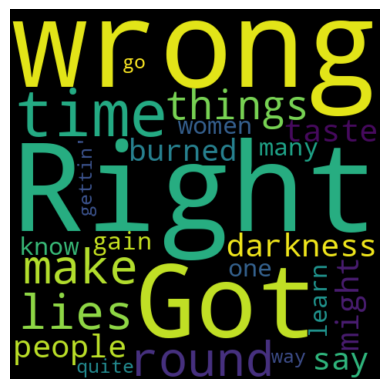

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(height=480, width=480, max_font_size=200, min_font_size=20)
wordcloud.generate_from_text(song_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show(block=False)

## Predicting Artists

Many artists have too few songs to do anything with, so let's see if we can predict any of the artists that we have more songs of.

**Task:** First extract the 10 artists that have the most songs in the dataset. Who are they? Then extract all the songs from these 10 artists and save it in a data frame.

In [ ]:
top_10_artists = list(songdata.artist.value_counts().head(10).index)
top_10_artists

['Donna Summer',
 'Gordon Lightfoot',
 'Bob Dylan',
 'George Strait',
 'Loretta Lynn',
 'Cher',
 'Alabama',
 'Reba Mcentire',
 'Chaka Khan',
 'Dean Martin']

In [ ]:
top_songdata = songdata[songdata.artist.isin(top_10_artists)]
top_songdata.head(5)

,artist,song,link,text,word_count,word_count_bins
361,Alabama,Calling All Angels,/a/alabama/calling+all+angels_20005071.html,"Calling, calling all angels, oh I'm calling, c...",279,"(270, 300]"
362,Alabama,Can't Keep A Good Man Down,/a/alabama/cant+keep+a+good+man+down_20522156....,I thought it was forever \nI thought it would...,348,"(330, 360]"
363,Alabama,Carolina Mountain Dew,/a/alabama/carolina+mountain+dew_20175804.html,Somewhere in the mountains......... In norther...,173,"(150, 180]"
364,Alabama,Christmas In Dixie,/a/alabama/christmas+in+dixie_20005147.html,"By now in New York City, there's snow on the g...",106,"(90, 120]"
365,Alabama,Christmas In Your Arms,/a/alabama/christmas+in+your+arms_20005047.html,All my friends are asking me where I plan to s...,181,"(180, 210]"


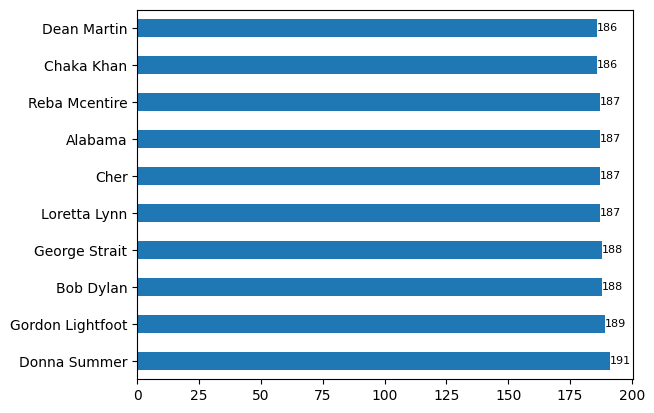

In [ ]:
top_10_artists_series = songdata.artist.value_counts().head(10)
ax = top_10_artists_series.plot(kind='barh')

for index, value in enumerate(top_10_artists_series):
    ax.text(value, index, str(value), ha='left', va='center', fontsize=8)

**Task:** Make a bar plot of the numbers of songs by artist.


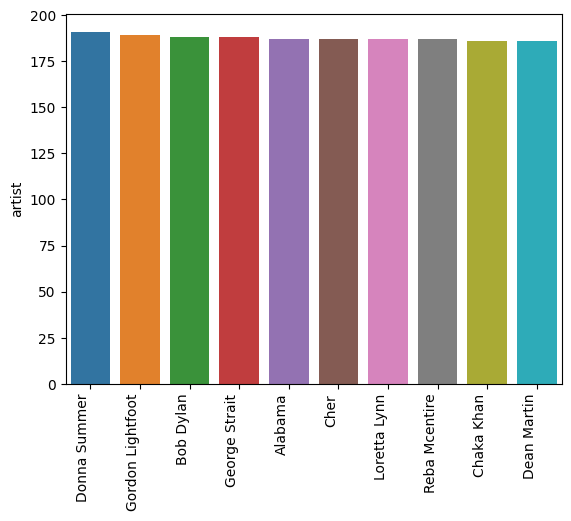

In [ ]:
sns.barplot(x=top_songdata['artist'].value_counts().index,
            y=top_songdata['artist'].value_counts())
plt.xticks(rotation=90, ha="right")
plt.show(block=False)

Great, nice and evenly distributed number of songs for each of the top artists. Time to get a baseline prediction.

**Task:** Make a train-test split with lyrics as input column and artist as target column. Split for 20% test size and fix random_state=42.

In [ ]:
X = top_songdata['text']
y = top_songdata['artist']
labels = y.unique()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

As always, we want to build a baseline first.

**Task:** Compute the log loss, accuracy and cross_val_score on the test set if for each song we predict the same probability for all the artists, i.e. each artists gets a probability of 10%.

**Hint:** As we are dealing with a multi-class problem of 10 classes, we need to pass a len(X_test)x10 dimensional array as the prediction.

In [ ]:
from sklearn.metrics import log_loss, accuracy_score
import statistics

def output_model_performance_report(model, X_train, X_test, y_train, y_test):

  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  pred_proba_train = model.predict_proba(X_train)
  pred_proba_test = model.predict_proba(X_test)

  print(f"Logloss train set: {log_loss(y_train, pred_proba_train): .4f}")
  print(f"Logloss test set: {log_loss(y_test, pred_proba_test): .4f}")
  print(f'Accuracy score train set: {accuracy_score(y_train, pred_train)}')
  print(f'Accuracy score test set: {accuracy_score(y_test, pred_test)}')
  print(f'Average score of cross validation score is: {statistics.mean(cross_val_score(model, X_train, y_train, cv=5))}')

In [ ]:
dummy_classifier = DummyClassifier(strategy='uniform')
dummy_classifier.fit(X_train, y_train)

output_model_performance_report(dummy_classifier, X_train, X_test, y_train, y_test)

Logloss train set:  2.3026
Logloss test set:  2.3026
Accuracy score train set: 0.11333333333333333
Accuracy score test set: 0.07712765957446809
Average score of cross validation score is: 0.09066666666666666


**Task:** Perform basic data cleaning by performing the following tasks:
  - convert text to lower case
  - remove special characters
  - remove double whitespace

In [ ]:
def clean(text: str):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s\']', '', text)
  text = re.sub(r'\s+', ' ', text)
  return text

In [ ]:
X_train = X_train.apply(clean)
X_test = X_test.apply(clean)

In [ ]:
X_test

27086    chorus do you love what you feel cause i love ...
30112    chorus whats the point of crying angel of joy ...
6731     i sure do like those christmas cookies sugar i...
17222    he can give you a reason to live if he wants t...
34322    get out old dan's records get out old dan's re...
                               ...                        
3871     as you are my love as you are my love say you'...
29137    trailer for sale or rent rooms to let fifty ce...
33910    well my baby's wearin' a permanent smile a sat...
11962    i believe for every drop of rain that falls a ...
27097    he's on his way he's goin' to hollywood he's b...
Name: text, Length: 376, dtype: object

**Task:** Build a pipeline consisting of a TFIDF vectorizer as well as a LogisticRegression. What's the log loss on the training and test set? Evaluate your predictions by looking at the mean of `cross_val_score` of that pipe.

**Hint:** You can use the helper function below

In [ ]:
from sklearn.metrics import log_loss

def predict_logloss_test_set(model, X_train, X_test, y_train, y_test):

  pred_train = model.predict_proba(X_train)
  pred_test = model.predict_proba(X_test)

  print(f"Logloss train set: {log_loss(y_train, pred_train): .4f}")
  print(f"Logloss test set: {log_loss(y_test, pred_test): .4f}")

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
output_model_performance_report(pipeline, X_train, X_test, y_train, y_test)

Logloss train set:  1.4279
Logloss test set:  1.9622
Accuracy score train set: 0.874
Accuracy score test set: 0.38563829787234044
Average score of cross validation score is: 0.3486666666666667


**Task:** Use the internal stop word removal from the TfidfVectorizer stop_words="english".

to get rid of the stopwords. What's the effect on the logloss and cross_val_score?

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text: str) -> str:
  tokens = text.split(' ')
  tokens = [token for token in tokens if token not in stopwords]
  return ' '.join(tokens)

In [ ]:
X_train = X_train.apply(remove_stopwords)
X_test = X_test.apply(remove_stopwords)
X_train

2543     slip shoes slide night i'm loose sights know g...
2396     chorus life dance life dance life dance life d...
33875    pack saddle throw twohorse trailer back truck ...
2516     well guess must fate we've tried deep inside w...
4427     lately changed acting strange something's wron...
                               ...                        
27106    born little rock childhood sweetheart always h...
29056    king five card stud stranger's game five card ...
23150    written randy owen teddy gentry greg fowler an...
30188    spoken know ladies gentlemen please know reall...
27102    hear music mighty fine music murmur morning br...
Name: text, Length: 1500, dtype: object

In [ ]:
pipeline.fit(X_train, y_train)
output_model_performance_report(pipeline, X_train, X_test, y_train, y_test)

Logloss train set:  1.4122
Logloss test set:  2.0124
Accuracy score train set: 0.9286666666666666
Accuracy score test set: 0.3696808510638298
Average score of cross validation score is: 0.35933333333333334


That's interesting! Results get worse after deleting the stop words, i.e. there seems to be some information in the stopwords. If we had more time, we should now probably go ahead and check which stopwords this might be...

**Task:** Import and initialize nltk's SnowballStemmer and create a function that takes a string, stems every word and chain the stemmed words back together in one string to return it.

The SnowballStemmer works just like the PorterStemmer (`stem()` function) but because it works for multiple languages, it has to be initialized by giving a language string ([see documentation](https://www.nltk.org/api/nltk.stem.html#nltk.stem.snowball.SnowballStemmer)).

In [ ]:
en_stemmer = SnowballStemmer('english')

def stemming(text: str) -> str:
  stems = [en_stemmer.stem(token) for token in text.split(' ')]
  return ' '.join(stems)

In [ ]:
X_train = X_train.apply(stemming)
X_test = X_test.apply(stemming)
X_train

2543     slip shoe slide night i'm loos sight know gonn...
2396     chorus life danc life danc life danc life danc...
33875    pack saddl throw twohors trailer back truck ho...
2516     well guess must fate we'v tri deep insid we'v ...
4427     late chang act strang someth wrong drag caus t...
                               ...                        
27106    born littl rock childhood sweetheart alway han...
29056    king five card stud stranger game five card st...
23150    written randi owen teddi gentri greg fowler an...
30188    spoken know ladi gentlemen pleas know realli l...
27102    hear music mighti fine music murmur morn breez...
Name: text, Length: 1500, dtype: object

**Task:** Run hyperparameter optimization for both the TfidfVectorizer and the Logistic Regression. Try the following parameters:
- max_features: [1000, 3000, None]
- max_df = [0.5, 0.7, 1]
- C = [0.7, 1, 2]

In [ ]:
param_grid = {
  'tfidf__max_features': [1000, 3000, None],
  'tfidf__max_df': [0.5, 0.7, 1],
  'classifier__C': [0.7, 1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.7, 1, 2],
                         'tfidf__max_df': [0.5, 0.7, 1],
                         'tfidf__max_features': [1000, 3000, None]})

In [ ]:
best_params = grid_search.best_params_
best_params

{'classifier__C': 0.7, 'tfidf__max_df': 0.7, 'tfidf__max_features': None}

In [ ]:
grid_search.best_score_

0.36000000000000004

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=best_params['tfidf__max_df'], max_features=best_params['tfidf__max_features'])),
    ('classifier', LogisticRegression(C=best_params['classifier__C']))
])
pipeline.fit(X_train, y_train)
output_model_performance_report(pipeline, X_train, X_test, y_train, y_test)

Logloss train set:  1.5857
Logloss test set:  2.0331
Accuracy score train set: 0.8773333333333333
Accuracy score test set: 0.3723404255319149
Average score of cross validation score is: 0.36


**Task (Bonus):** Plot the confusion matrix (in %) on the test set. Make sure the values are normalized, i.e. the sum over the predicted values per true label should be equal to 1.

 Use `plot_confusion_matrix` of sklearn to have a closer look at our predictions.

1. Fit your latest/best pipe to the training data, and
1. Create the confusion matrix for the test data, and
1. Customize it by normalizing along 'true' values.


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def display_confusion_matrix(y_test, y_pred, names):
  cm = confusion_matrix(y_test, y_pred)
  cm_proportions = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  ConfusionMatrixDisplay(confusion_matrix=cm_proportions, display_labels=names).plot()

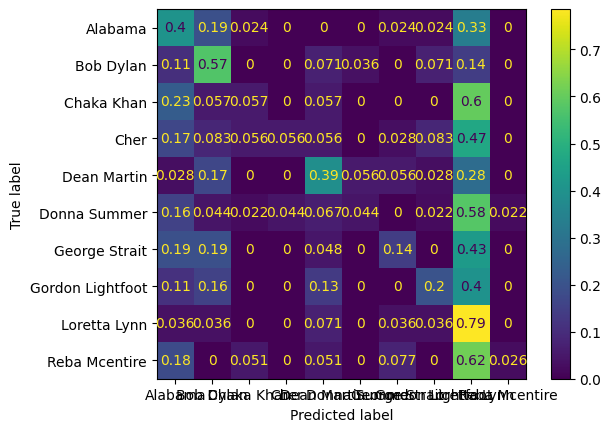

In [ ]:
y_pred = pipeline.predict(X_test)
display_confusion_matrix(y_test, y_pred, labels)

Even if we can't safely make prediction with this kind of an accuracy, we found out that some artists are more distinguishable than others in terms of their lyrics.

## Bonus

**Task**:
We have seen that the default list of stopwords is no good. Let's make our own small list of stopwords.

To do that, we first need to find out **which words appear often**, because they may have a potentially bigger impact on our model, when treated as a stopword.

**Task:** Use sklearns CountVectorizer to make your corpus into a bag-of-words (i.e. fit_transform on your stemmed text data). Inspect the shape of your bag-of-words.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
bow = count_vectorizer.fit_transform(X)
print("Shape of bow:", bow.shape)

Shape of bow: (1876, 10176)


The second value in the shape is the number of columns in this matrix, or the **number of unique words** in the corpus.

**Task:** Take the sum of the entries in this matrix along **axis 0** (per column). Verify with the shape of the result that you have one value per word.

Doing this, you end up with  >8k  entries, one per word. The order of these entries corresponds to the order of the words in get_feature_names() from CountVectorizer.

Task: Use the given wordcount_np_array to create a pandas series and set its index to get_feature_names() from the CountVectorizer.

Display the 20 largest entries in this series.


In [ ]:
wordcount_np_array = np.array(bow.sum(axis=0))[0]

# Your code here:
print("Shape of word_counts:", wordcount_np_array.shape)

Shape of word_counts: (10176,)


Let's keep personal pronouns like "you" or "me", as well as "love", because they may hold more meaning in songs than we might think.

**Task:** Create your own stopword list and select 10 non-descriptive words from this list of top 20 words in your corpus.

In [ ]:
feature_names = count_vectorizer.get_feature_names_out()

word_counts_series = pd.Series(wordcount_np_array, index=feature_names)

print("Top 20 Words by Count:\n",word_counts_series.nlargest(20))

Top 20 Words by Count:
 the     14635
you     13523
and      9256
to       8807
it       6074
me       5703
in       5093
my       4970
of       4356
that     4209
love     3852
on       3314
be       2949
your     2877
all      2838
is       2673
can      2641
for      2637
we       2532
but      2350
dtype: int64


In [ ]:
stopwords = ['the', 'you', 'and', 'to', 'it', 'me', 'in', 'my', 'of', 'that']

**Task:** Split your data again as before, but use the stemmed text as input now.

In [ ]:
X = X.apply(stemming)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Task: Recreate your pipeline and give the TfidfVectorizer your custom list of stopwords.

Re-evaluate this pipe with the mean of the cross_val_score.

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('classifier', LogisticRegression())
])
pipeline.fit(X_train, y_train)
output_model_performance_report(pipeline, X_train, X_test, y_train, y_test)

Logloss train set:  1.4071
Logloss test set:  1.9543
Accuracy score train set: 0.884
Accuracy score test set: 0.3723404255319149
Average score of cross validation score is: 0.36666666666666664


**Bonus:** Use the `token_pattern` option of TfidfVectorizer and give it a regular expression that detects words such as "don't", "it's" and "we're". By default, any punctuation separates two words in this vectorizer.

Also increase the regularization parameter to `C=2` in the logistic regression and evaluate the pipe again.

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords, token_pattern=r'\b\w+\b')),
    ('classifier', LogisticRegression(C=2))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
output_model_performance_report(pipeline, X_train, X_test, y_train, y_test)

Logloss train set:  1.0610
Logloss test set:  1.8785
Accuracy score train set: 0.9373333333333334
Accuracy score test set: 0.3803191489361702
Average score of cross validation score is: 0.36266666666666664
